## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.03758473],
       [0.14133601],
       [0.36418096],
       [0.60357501],
       [0.6333835 ]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.01935539,  0.11759193,  0.25649862,  0.28402512,  0.39805908,
        0.58849934,  0.67998465,  0.78623616,  0.97101473,  0.99165493,
        0.99551605,  0.99889419,  0.97508958,  0.94726232,  0.88647125,
        0.88113946,  0.87787854,  0.74964888,  0.64061956,  0.54423601,
        0.49651831,  0.48938883,  0.48085786,  0.46242761,  0.21805665,
        0.18047281,  0.14323096, -0.23394756, -0.27853487, -0.33821746,
       -0.4612491 , -0.47217608, -0.50344021, -0.56131337, -0.82508294,
       -0.88093544, -0.89337814, -0.90268595, -0.97852896, -0.99189954])

In [5]:
np.sin( X )[:5]

array([[ 0.01935539],
       [ 0.11759193],
       [ 0.25649862],
       [ 0.28402512],
       [ 0.39805908]])

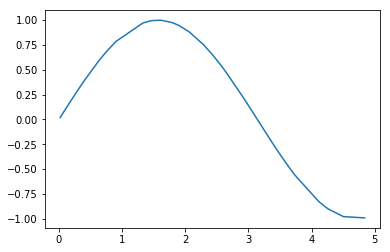

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

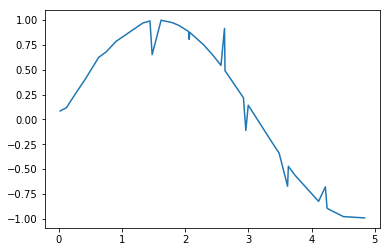

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[ 0.        ],
       [ 0.01002004],
       [ 0.02004008],
       [ 0.03006012],
       [ 0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [65]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

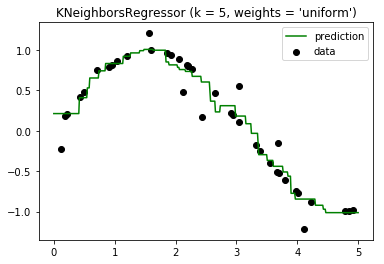

In [66]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

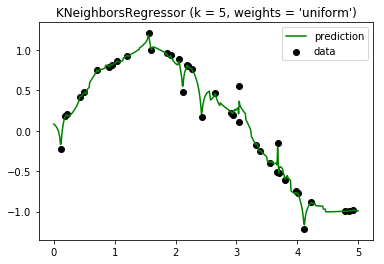

In [68]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()